Number of images in Demented directory: 3018
Number of images in NonDemented directory: 3200


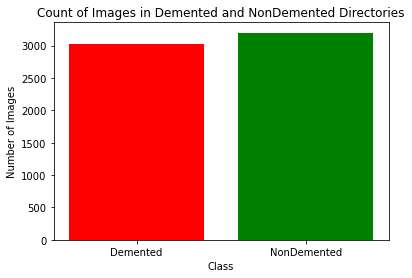

In [1]:
import os
import matplotlib.pyplot as plt

def count_images_in_directory(directory):
    image_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_count += 1
    return image_count

# Example usage:
data_dir = r"/home/lab5/Downloads/combined"
demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')

num_demented_images = count_images_in_directory(demented_dir)
num_non_demented_images = count_images_in_directory(non_demented_dir)

# Print counts
print("Number of images in Demented directory:", num_demented_images)
print("Number of images in NonDemented directory:", num_non_demented_images)

# Plotting
labels = ['Demented', 'NonDemented']
counts = [num_demented_images, num_non_demented_images]

plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Count of Images in Demented and NonDemented Directories')
plt.show()


In [2]:
import os
import cv2
import numpy as np

def preprocess_image(image_path, target_size):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image
    resized_image = cv2.resize(image, target_size)
    
    # Rescale the image (optional)
    resized_image = resized_image.astype('float32') / 255.0
    
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    return grayscale_image

def preprocess_directory(directory, target_size):
    preprocessed_images = []
    labels = []
    label = 0 if directory.endswith('NonDemented') else 1  # Assign label based on directory name
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Ensure only image files are processed
            image_path = os.path.join(directory, filename)
            preprocessed_image = preprocess_image(image_path, target_size)
            preprocessed_images.append(preprocessed_image)
            labels.append(label)
    return preprocessed_images, labels

# Example usage:
target_size = (224,224)  # Specify your desired target size

demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')


preprocessed_demented_images, demented_labels = preprocess_directory(demented_dir, target_size)
preprocessed_non_demented_images, non_demented_labels = preprocess_directory(non_demented_dir, target_size)

# Combine the data from both directories
images = preprocessed_demented_images + preprocessed_non_demented_images
labels = demented_labels + non_demented_labels

# Now, all_images contains preprocessed image data and all_labels contains corresponding labels.
images = np.array(images)
labels = np.array(labels)



In [3]:
from sklearn.model_selection import train_test_split
# Separate data for Normal and Tuberculosis classes
# nonDemented_images = images[labels == 0][:3000]
# Demented_images = images[labels == 1][:3000]
# nonDemented_labels = labels[labels == 0][:3000]
# Demented_labels = labels[labels == 1][:3000]

# Concatenate the data back together
# images = np.concatenate([nonDemented_images, Demented_images])
# labels = np.concatenate([nonDemented_labels, Demented_labels])
# # Split the balanced dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)



#print the balanced data
print("Balanced Images:",images.shape)
print("Balanced labels:",labels.shape)

#print the data seperately of each class
# print("nonDemented_images:",nonDemented_images.shape)
# print("Demented_images:",Demented_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_valid shape:", y_valid.shape)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Balanced Images: (6218, 224, 224)
Balanced labels: (6218,)
X_train shape: (4476, 224, 224)
X_valid shape: (498, 224, 224)
X_test shape: (1244, 224, 224)
y_train shape: (4476,)
y_test shape: (1244,)
y_valid shape: (498,)


# Base Model

2024-03-25 14:33:16.834980: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 14:33:16.875812: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 14:33:17.089799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 14:33:17.089897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 14:33:17.125792: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, None, None, 32)       6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, None, None, 64)       192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, None, None, 64)       192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, None, None, 96)       288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, None, None, 96)       0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, None, None, 64)       0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, None, None, 288)      0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, None, None, 96)       55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, None, None, 96)       288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, None, None, 96)       0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, None, None, 384)      995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, None, None, 192)      147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, None, None, 192)      172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, None, None, 192)      172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, None, None, 192)      147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, None, None, 192)      576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, None, None, 768)      0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, None, None, 192)      147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, None, None, 192)      215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, None, None, 192)      215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, None, None, 160)      0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, None, None, 160)      0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, None, None, 768)      0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, None, None, 192)      576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, None, None, 192)      576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, None, None, 192)      0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, None, None, 192)      0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, None, None, 320)      552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, None, None, 192)      331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, None, None, 320)      960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, None, None, 192)      576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, None, None, 384)      0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, None, None, 384)      0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, None, None, 192)      576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, None, None, 384)      0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, None, None, 384)      0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, None, None, 384)      0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

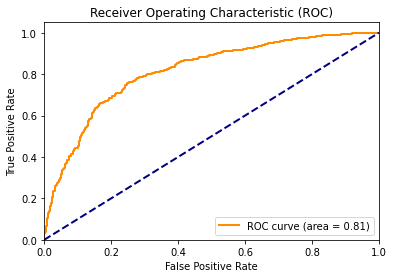

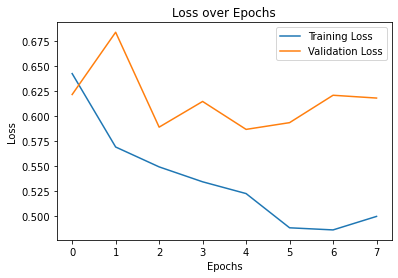

Accuracy: 0.7419614147909968
Precision: 0.7203994293865906
Recall: 0.8015873015873016
F1 Score: 0.7588279489105936
Confusion Matrix:
[[418 196]
 [125 505]]
Cohen's Kappa: 0.483078404772014
Matthews Correlation Coefficient: 0.4862672048943333
Balanced Accuracy: 0.7411845302724782
True Positives: 505
True Negatives: 418
False Positives: 196
False Negatives: 125
39/39 [==============================] - 4s 94ms/step - loss: 0.5333 - accuracy: 0.7420
Test Accuracy: 74.20%
Test Loss: 53.33%
Execution time: 113.37665581703186
Metrics saved to metrics.csv file.


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import cv2

import time
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)



# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model_inception.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_inception.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inception.fit(X_train_resized, y_train, epochs=75, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])


# Predict probabilities for test labels
predicted_probabilities = model_inception.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
# Calculate Cohen's Kappa
total_agreements = conf_matrix[0, 0] + conf_matrix[1, 1]
total = np.sum(conf_matrix)
po = total_agreements / total
pe = ((np.sum(conf_matrix[0]) / total) * (np.sum(conf_matrix[:, 0]) / total)) + ((np.sum(conf_matrix[1]) / total) * (np.sum(conf_matrix[:, 1]) / total))
kappa = (po - pe) / (1 - pe)

# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Calculate Balanced Accuracy
sensitivity = recall_score(y_test, predicted_labels)
specificity = tn / (tn + fp)
balanced_accuracy = (sensitivity + specificity) / 2
# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model_inception.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)
# Save metrics to DataFrame
# Save metrics to DataFrame
metrics = {
    'Combination':'1',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
metrics_df = pd.DataFrame(metrics, index=[0])

# Save DataFrame to CSV
metrics_df.to_csv('Inception_Final_75_metrics.csv', index=False)

print("Metrics saved to metrics.csv file.")

# Base Model + Dense

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, None, None, 32)       96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, None, None, 32)       0         ['batch_normalization_94

                                                                                                  
 conv2d_105 (Conv2D)         (None, None, None, 32)       6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, None, None, 64)       192       ['conv2d_99[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, None, None, 64)       192       ['conv2d_101[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, None, None, 96)       288       ['conv2d_104[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, None, None, 96)       0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, None, None, 64)       0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, None, None, 288)      0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, None, None, 96)       55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, None, None, 96)       288       ['conv2d_122[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, None, None, 96)       0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_12

                                                                                                  
 conv2d_124 (Conv2D)         (None, None, None, 192)      147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_127 (Conv2D)         (None, None, None, 192)      172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_132 (Conv2D)         (None, None, None, 192)      172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_133 (Conv2D)         (None, None, None, 192)      147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, None, None, 192)      576       ['conv2d_124[0][0]']          
 atchNorma

 activation_141 (Activation  (None, None, None, 160)      0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, None, None, 768)      0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_134 (Conv2D)         (None, None, None, 192)      147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_137 (Conv2D)         (None, None, None, 192)      215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_14

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, None, None, 160)      0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, None, None, 160)      0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, None, None, 768)      0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, None, None, 192)      576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, None, None, 192)      576       ['conv2d_161[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, None, None, 192)      0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, None, None, 320)      552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_169 (Conv2D)         (None, None, None, 192)      331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, None, None, 320)      960       ['conv2d_165[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, None, None, 192)      576       ['conv2d_169[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, None, None, 384)      0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, None, None, 384)      0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, None, None, 192)      576       ['conv2d_178[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, None, None, 384)      0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, None, None, 384)      0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, None, None, 384)      0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

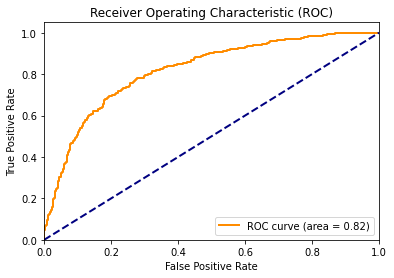

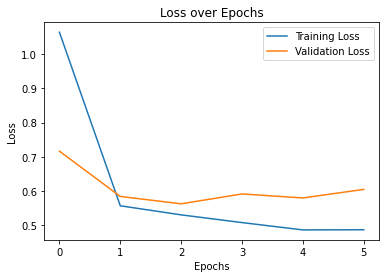

Accuracy: 0.747588424437299
Precision: 0.75
Recall: 0.7523809523809524
F1 Score: 0.751188589540412
Confusion Matrix:
[[456 158]
 [156 474]]
Cohen's Kappa: 0.4950724397886268
Matthews Correlation: 0.4950750001482587
Balanced Accuracy: 0.7475259810764696
True Positives: 474
True Negatives: 456
False Positives: 158
False Negatives: 156
39/39 [==============================] - 4s 93ms/step - loss: 0.5241 - accuracy: 0.7476
Test Accuracy: 74.76%
Test Loss: 52.41%
Execution time: 103.05090832710266
Metrics appended to metrics.csv file.


In [5]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model_inception.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_inception.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inception.fit(X_train_resized, y_train, epochs=75, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])


# Predict probabilities for test labels
predicted_probabilities = model_inception.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model_inception.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('Inception_Final_75_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['2'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('Inception_Final_75_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + conv2D (3,3)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, None, None, 32)       864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, None, None, 32)       96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, None, None, 32)       0         ['batch_normalization_18

                                                                                                  
 conv2d_199 (Conv2D)         (None, None, None, 32)       6144      ['average_pooling2d_18[0][0]']
                                                                                                  
 batch_normalization_193 (B  (None, None, None, 64)       192       ['conv2d_193[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_195 (B  (None, None, None, 64)       192       ['conv2d_195[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_198 (B  (None, None, None, 96)       288       ['conv2d_198[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_205 (Activation  (None, None, None, 96)       0         ['batch_normalization_205[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_206 (Activation  (None, None, None, 64)       0         ['batch_normalization_206[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, None, None, 288)      0         ['activation_200[0][0]',      
                                                                     'activation_202[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_216 (Conv2D)         (None, None, None, 96)       55296     ['activation_215[0][0]']      
                                                                                                  
 batch_normalization_216 (B  (None, None, None, 96)       288       ['conv2d_216[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_216 (Activation  (None, None, None, 96)       0         ['batch_normalization_216[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_21

                                                                                                  
 conv2d_218 (Conv2D)         (None, None, None, 192)      147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_221 (Conv2D)         (None, None, None, 192)      172032    ['activation_220[0][0]']      
                                                                                                  
 conv2d_226 (Conv2D)         (None, None, None, 192)      172032    ['activation_225[0][0]']      
                                                                                                  
 conv2d_227 (Conv2D)         (None, None, None, 192)      147456    ['average_pooling2d_21[0][0]']
                                                                                                  
 batch_normalization_218 (B  (None, None, None, 192)      576       ['conv2d_218[0][0]']          
 atchNorma

 activation_235 (Activation  (None, None, None, 160)      0         ['batch_normalization_235[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_22 (Aver  (None, None, None, 768)      0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_228 (Conv2D)         (None, None, None, 192)      147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_231 (Conv2D)         (None, None, None, 192)      215040    ['activation_230[0][0]']      
                                                                                                  
 conv2d_23

 atchNormalization)                                                                               
                                                                                                  
 activation_240 (Activation  (None, None, None, 160)      0         ['batch_normalization_240[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_245 (Activation  (None, None, None, 160)      0         ['batch_normalization_245[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_23 (Aver  (None, None, None, 768)      0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_250 (B  (None, None, None, 192)      576       ['conv2d_250[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_255 (B  (None, None, None, 192)      576       ['conv2d_255[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_250 (Activation  (None, None, None, 192)      0         ['batch_normalization_250[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_259 (Conv2D)         (None, None, None, 320)      552960    ['activation_258[0][0]']      
                                                                                                  
 conv2d_263 (Conv2D)         (None, None, None, 192)      331776    ['activation_262[0][0]']      
                                                                                                  
 batch_normalization_259 (B  (None, None, None, 320)      960       ['conv2d_259[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_263 (B  (None, None, None, 192)      576       ['conv2d_263[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_270 (Activation  (None, None, None, 384)      0         ['batch_normalization_270[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_271 (Activation  (None, None, None, 384)      0         ['batch_normalization_271[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_272 (B  (None, None, None, 192)      576       ['conv2d_272[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_276 (Activation  (None, None, None, 384)      0         ['batch_normalization_276[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_279 (Activation  (None, None, None, 384)      0         ['batch_normalization_279[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_280 (Activation  (None, None, None, 384)      0         ['batch_normalization_280[0][0
 )                                                                  ]']                           
          

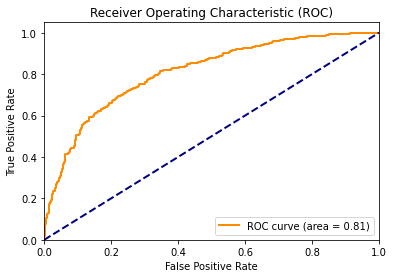

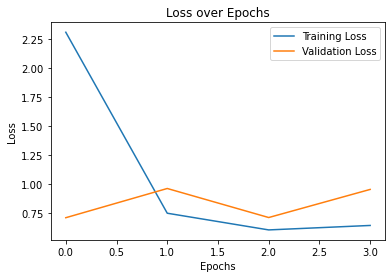

Accuracy: 0.729903536977492
Precision: 0.7047353760445683
Recall: 0.8031746031746032
F1 Score: 0.7507418397626113
Confusion Matrix:
[[402 212]
 [124 506]]
Cohen's Kappa: 0.4587326088532979
Matthews Correlation: 0.46341262020872226
Balanced Accuracy: 0.728948865105217
True Positives: 506
True Negatives: 402
False Positives: 212
False Negatives: 124
39/39 [==============================] - 4s 93ms/step - loss: 0.6599 - accuracy: 0.7299
Test Accuracy: 72.99%
Test Loss: 65.99%
Execution time: 72.9462194442749
Metrics appended to metrics.csv file.


In [6]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Conv2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import time
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a convolutional layer
x = Conv2D(64, (3, 3), activation='relu')(base_model.output)

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)



# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model_inception.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_inception.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inception.fit(X_train_resized, y_train, epochs=75, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])


# Predict probabilities for test labels
predicted_probabilities = model_inception.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model_inception.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('Inception_Final_75_metrics.csv')

# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['3'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('Inception_Final_75_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + Dense + conv2D 

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_283 (Conv2D)         (None, None, None, 32)       864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, None, None, 32)       96        ['conv2d_283[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, None, None, 32)       0         ['batch_normalization_28

                                                                                                  
 conv2d_294 (Conv2D)         (None, None, None, 32)       6144      ['average_pooling2d_27[0][0]']
                                                                                                  
 batch_normalization_287 (B  (None, None, None, 64)       192       ['conv2d_288[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_289 (B  (None, None, None, 64)       192       ['conv2d_290[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_292 (B  (None, None, None, 96)       288       ['conv2d_293[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_299 (Activation  (None, None, None, 96)       0         ['batch_normalization_299[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_300 (Activation  (None, None, None, 64)       0         ['batch_normalization_300[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, None, None, 288)      0         ['activation_294[0][0]',      
                                                                     'activation_296[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_311 (Conv2D)         (None, None, None, 96)       55296     ['activation_309[0][0]']      
                                                                                                  
 batch_normalization_310 (B  (None, None, None, 96)       288       ['conv2d_311[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_310 (Activation  (None, None, None, 96)       0         ['batch_normalization_310[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_30

                                                                                                  
 conv2d_313 (Conv2D)         (None, None, None, 192)      147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_316 (Conv2D)         (None, None, None, 192)      172032    ['activation_314[0][0]']      
                                                                                                  
 conv2d_321 (Conv2D)         (None, None, None, 192)      172032    ['activation_319[0][0]']      
                                                                                                  
 conv2d_322 (Conv2D)         (None, None, None, 192)      147456    ['average_pooling2d_30[0][0]']
                                                                                                  
 batch_normalization_312 (B  (None, None, None, 192)      576       ['conv2d_313[0][0]']          
 atchNorma

 activation_329 (Activation  (None, None, None, 160)      0         ['batch_normalization_329[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_31 (Aver  (None, None, None, 768)      0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_323 (Conv2D)         (None, None, None, 192)      147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_326 (Conv2D)         (None, None, None, 192)      215040    ['activation_324[0][0]']      
                                                                                                  
 conv2d_33

 atchNormalization)                                                                               
                                                                                                  
 activation_334 (Activation  (None, None, None, 160)      0         ['batch_normalization_334[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_339 (Activation  (None, None, None, 160)      0         ['batch_normalization_339[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_32 (Aver  (None, None, None, 768)      0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_344 (B  (None, None, None, 192)      576       ['conv2d_345[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_349 (B  (None, None, None, 192)      576       ['conv2d_350[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_344 (Activation  (None, None, None, 192)      0         ['batch_normalization_344[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_354 (Conv2D)         (None, None, None, 320)      552960    ['activation_352[0][0]']      
                                                                                                  
 conv2d_358 (Conv2D)         (None, None, None, 192)      331776    ['activation_356[0][0]']      
                                                                                                  
 batch_normalization_353 (B  (None, None, None, 320)      960       ['conv2d_354[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_357 (B  (None, None, None, 192)      576       ['conv2d_358[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_364 (Activation  (None, None, None, 384)      0         ['batch_normalization_364[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_365 (Activation  (None, None, None, 384)      0         ['batch_normalization_365[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_366 (B  (None, None, None, 192)      576       ['conv2d_367[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_370 (Activation  (None, None, None, 384)      0         ['batch_normalization_370[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_373 (Activation  (None, None, None, 384)      0         ['batch_normalization_373[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_374 (Activation  (None, None, None, 384)      0         ['batch_normalization_374[0][0
 )                                                                  ]']                           
          

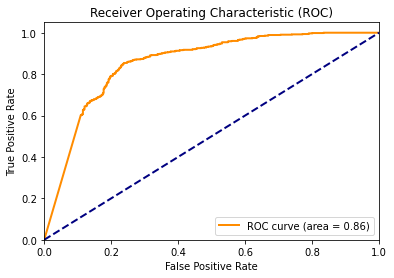

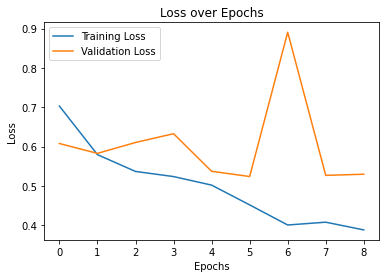

Accuracy: 0.8030546623794212
Precision: 0.7886056971514243
Recall: 0.834920634920635
F1 Score: 0.8111025443330764
Confusion Matrix:
[[473 141]
 [104 526]]
Cohen's Kappa: 0.6057424635986381
Matthews Correlation: 0.6068190426177664
Balanced Accuracy: 0.80263947055478
True Positives: 526
True Negatives: 473
False Positives: 141
False Negatives: 104
39/39 [==============================] - 4s 93ms/step - loss: 0.4673 - accuracy: 0.8031
Test Accuracy: 80.31%
Test Loss: 46.73%
Execution time: 146.37193727493286
Metrics appended to metrics.csv file.


In [7]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import time
import matplotlib.pyplot as plt

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add convolutional layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu')(x)  # Add a Conv2D layer
# Add more Conv2D layers if needed

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a Dense layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer
predictions = Dense(1, activation='sigmoid')(x)

# This is the model we will train
model_inception = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer
model_inception.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_inception.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_inception.fit(X_train_resized, y_train, epochs=75, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])


# Predict probabilities for test labels
predicted_probabilities = model_inception.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model_inception.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)
# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('Inception_Final_75_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['4'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('Inception_Final_75_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")
